In [7]:
import os
import zipfile
import scipy.io
import matplotlib.pyplot as plt
import imp
import warnings

warnings.filterwarnings("ignore")

from glob import glob
from keras.models import load_model
from collections import Counter
import cv2
import biosppy
import scipy.io
import matplotlib.pyplot as plt
import numpy as np

file_name = 'ECG signals (1000 fragments).zip'
zip_file_path = os.path.join('./', file_name)
unzip_file_path = os.path.join('./', 'MLII')
if not os.path.exists(unzip_file_path):
    # Unzip the file
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall('./')
        

        


In [8]:
os.path.exists('MLII/1 NSR/228m (10).mat')

True

In [3]:

class PredictArrhythmia():
    def __init__(self, directory):
        self.directory = directory
    # Phân đoạn array
    def segmentation(self,signal):
        """signal: np.ndarray
        segment signal into multiple signals each contain a heart beat
        """
        data=signal
        signals = []
        count = 1
        peaks =  biosppy.signals.ecg.christov_segmenter(signal=data, sampling_rate = 360)[0]
        for i in (peaks[1:-1]):
            diff1 = abs(peaks[count - 1] - i)
            diff2 = abs(peaks[count + 1]- i)
            x = peaks[count - 1] + diff1//2
            y = peaks[count + 1] - diff2//2
            signal = data[x:y]
            signals.append(signal)
            count += 1
        return signals

    # Convert array to image
    def array_to_img(self, array, directory):  
        count=1
        for _,i in enumerate(array):
            
            fig = plt.figure(frameon=False)
            plt.plot(i) 
            plt.xticks([]), plt.yticks([])
            for spine in plt.gca().spines.values():
                spine.set_visible(False)

            filename = directory + '/{}.png'.format(count)
            fig.savefig(filename)
            im_gray = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
            im_gray = cv2.resize(im_gray, (128, 128), interpolation = cv2.INTER_LANCZOS4)
            cv2.imwrite(filename, im_gray)
            plt.cla()
            plt.clf()
            plt.close('all')
            count+=1

    def signal_to_image(self,signal): 
        """
        Signal: np.ndarray
        Convert a signal to multiple images base on peaks
        """           
        array=self.segmentation(signal)
        self.array_to_img(array,self.directory)

In [9]:
mat = scipy.io.loadmat("MLII/1 NSR/228m (10).mat")
values = mat.get("val")[0]

a = PredictArrhythmia("test")
a.signal_to_image(values)


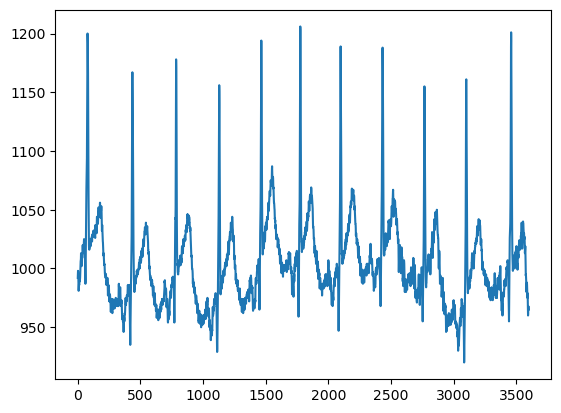

In [6]:
plt.plot(values)